**Auto-MPG 데이터셋 소개**

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

# Auto-MPG 단순 회귀 분석(Simple Linear Regression)

## 기본 라이브러리 불러오기

In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# 오류 메세지 안뜨게
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 준비하기

### 데이터 불러오기

In [8]:
df= pd.read_csv('auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


🍭**`여기서 잠깐!`**  원래 알고있는 mpg 데이터 셋가 뭔가 다르지않나??

  > seaborn에서 제공하는 mpg 데이터셋과 비교해보자면!!  => origin 국가별 라벨인코딩이 되어있는 상태이고, 열도 빠져있는 상태임!

In [7]:
sns.load_dataset("mpg").head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
sns.load_dataset("mpg").columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

==> 일단 회귀분석을 돌리는 데 집중해야하니까, 갖고 있는 csv의 열 이름만 채워보쟈!

### 데이터 준비 

In [10]:
# 열 설정하기
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name']

## 데이터 살펴보기

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


* mpg : 연비(miles per gallon)
* cylinders : 실린더수 
* displacement : 배기량
* horsepower: 출력
* weight : 차 무게
* acceleration : 가속능력
* model year : 출시년도
* origin : 제조국 1(USA), 2(EU), 3(JPN)
* name : 모델명

In [13]:
df.shape

(398, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


🪄**point**  
horsepower가 문자열로 되어있어서 바꿔줘야할 듯! 

In [17]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

결측치가 정말 없는 건지, 각 열의 unique값 확인하기

In [22]:
for i in df.columns:
    print(df[i].unique())
    print()

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

[8 4 6 3 5]

[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171.  115.  

🪄**point**  
결측치가 물음표? 로 되어있음. 대치해줘야함!

In [30]:
for i in df.columns:
    if "?"in df[i].unique():
        print(i,"에는 '?' 결측치가 포함되어 있어요!")
        print("===")
print("검사 끄읏-!")

horsepower 에는 '?' 결측치가 포함되어 있어요!
===
검사 끄읏-!


## 데이터 전처리

### 결측치 처리하기

==> 평균으로 바꾸거나, 삭제하거나

In [35]:
# ? 를 결측치로 바꾸고 개수 확인하기
df.horsepower.replace("?",np.nan, inplace=True)
df.horsepower.isnull().sum()

6

#### 평균으로 바꿀까?

In [49]:
tmp_horsepower = df.horsepower.dropna(axis=0)

In [58]:
df.shape

(398, 9)

In [50]:
tmp_horsepower.shape

# 398 ->392로 바뀜을 확인

(392,)

In [57]:
tmp_horsepower.astype("float").describe().to_frame()

,horsepower
count,392.000000
mean,104.469388
std,38.491160
min,46.000000
25%,75.000000
50%,93.500000
75%,126.000000
max,230.000000


<AxesSubplot:ylabel='Density'>

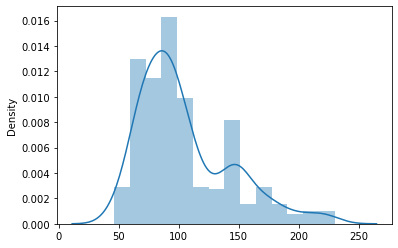

In [43]:
sns.distplot(df[['horsepower']])

#### 삭제 할까?

In [48]:
# 결측치의 퍼센트는??

( df.horsepower.isnull().sum() / df.shape[0] ) *100

1.507537688442211

#### 결측치 처리하자!

In [63]:
df.dropna(subset=["horsepower"], axis=0,inplace=True)

In [64]:
df.shape

(392, 9)

### object를 float로 바꾸기

In [65]:
df.horsepower.dtype

dtype('O')

In [66]:
df["horsepower"] = df.horsepower.astype("float")

In [67]:
df.horsepower.dtype

dtype('float64')

## 독립변수(x), 종속변수(y) 정해보기

<AxesSubplot:>

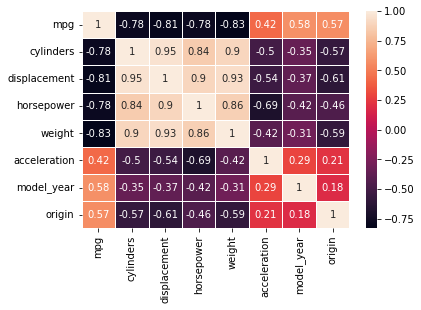

In [107]:
sns.heatmap(df.corr(),annot=True, linewidths=0.5)

**`독립변수(x)`** : 실린더 수cylinders, 마력horsepower, 차 무게weight  
**`종속변수(y)`** : 연비mpg

In [109]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


## 시각화 - 상관관계 파악하기

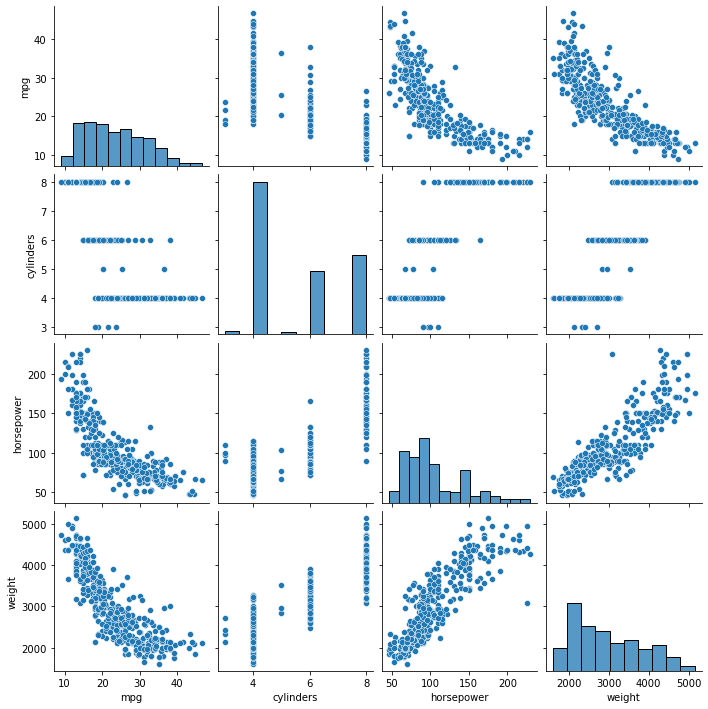

In [69]:
# pairplot
sns.pairplot(ndf)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

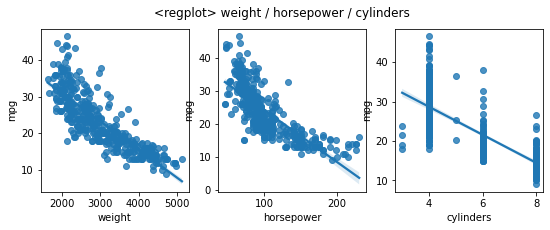

In [102]:
# jointplot
fig = plt.figure(figsize=(9, 3))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

plt.suptitle("<regplot> weight / horsepower / cylinders ")

sns.regplot(data=ndf, x="weight", y="mpg", ax=ax1)
sns.regplot(data=ndf, x="horsepower", y="mpg", ax=ax2)
sns.regplot(data=ndf, x="cylinders", y="mpg", ax=ax3)

## Train / Test 데이터 분할하기

위 상관관계 그래프를 통해 **독립변수x**는 weight와 horsepower, **종속변수y**는 mpg

In [110]:
X= ndf[["weight"]]
y=ndf['mpg']

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=42) #랜덤 추출 값 

In [113]:
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


## 모형 학습

In [114]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [115]:
# train 데이터로 모형학습

lr.fit(X_train, y_train)

LinearRegression()

## score

In [116]:
# 결정계수
lr.score(X_test, y_test)

0.6653479018765671

In [117]:
# weight와 horsepower
print('기울기: ', lr.coef_)

기울기:  [-0.00798478]


In [118]:
print('y절편', lr.intercept_)

y절편 47.484033379071676


## 시각화 - 예측정도

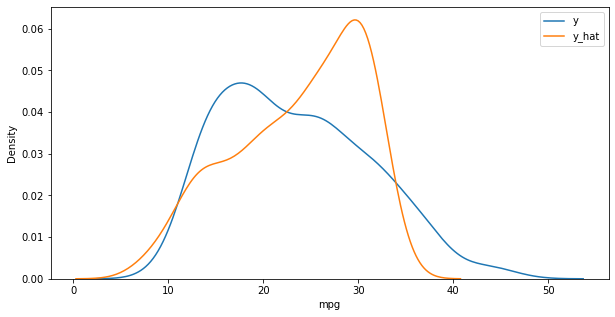

In [119]:
# 예측값 y_hat 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))

ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)

plt.legend()

그래프를 통하여 주황색 예측값이 오른쪽으로 뾰족하게, 실제 값과 반대쪽으로 뾰족함. 좀더 오차를 줄일 필요가 있다!